In [1]:
#Import Dependencies
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np






In [22]:
#using pd.read to read the html url 
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
HTML = pd.read_html(url)
HTML

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [23]:
#coverting data into datafram
table = HTML[0]

In [24]:
table.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [25]:
#fixing datatypes to correct format
table['id'] = table['id'].astype(int)
table['terrestrial_date'] = pd.to_datetime(table['terrestrial_date'], format="%Y-%m-%d")
table['sol'] = table['sol'].astype(int)
table['ls'] = table['ls'].astype(int)
table['month'] = table['month'].astype(int)
table['min_temp'] = table['min_temp'].astype(float)
table['pressure'] = table['pressure'].astype(float)

In [26]:
#Answer the following question: How many months exist on Mars?

#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

#Export the DataFrame to a CSV file.

In [29]:
#Answer the following question: How many months exist on Mars?
max_month  = table['month'].max()
max_month

12

In [40]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
Days_in_year = table['sol'].drop_duplicates
Days_in_year
#length shows there is 1867 different days in dataset 


<bound method Series.drop_duplicates of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int32>

In [51]:
#group columns on mounth and find mean
Avg = table.groupby('month').mean()
Avg.head




<bound method NDFrame.head of                 id          sol          ls   min_temp    pressure
month                                                             
1      1013.873563  1077.574713   15.281609 -77.160920  862.488506
2      1109.882022  1175.853933   44.258427 -79.932584  889.455056
3      1132.697917  1204.406250   75.010417 -83.307292  877.322917
4      1175.164948  1244.500000  104.365979 -82.747423  806.329897
5      1115.033557  1182.691275  132.885906 -79.308725  748.557047
6       735.306122   750.829932  164.897959 -75.299320  745.054422
7       714.549296   715.105634  194.894366 -72.281690  795.105634
8       718.078014   795.333333  224.347518 -68.382979  873.829787
9       785.843284   861.186567  254.052239 -69.171642  913.305970
10      955.723214  1034.669643  286.330357 -71.982143  887.312500
11      874.246377   947.224638  314.536232 -71.985507  857.014493
12      931.602410   990.951807  344.692771 -74.451807  842.156627>

In [52]:
#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
#Avg
#printing out min and max values 
coldest = Avg['min_temp'].min()
warmest = Avg['min_temp'].max()
 
 



In [53]:
coldest

-83.30729166666667

In [54]:
warmest

-68.38297872340425

Text(0.5, 1.0, 'Minimum Temps')

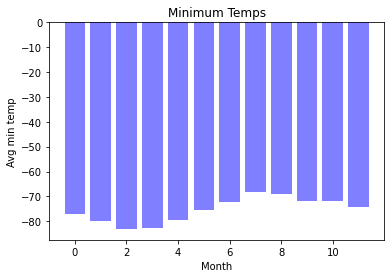

In [64]:
#plotting the months coldest temps
yAxis = Avg['min_temp']
xAxis = np.arange(len(yAxis))
plt.bar(xAxis, yAxis, color='b', alpha=0.5, align="center")
plt.xlabel('Month')
plt.ylabel('Avg min temp')
plt.title('Minimum Temps')

In [65]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

#printing out min and max values lowPressure = marsAvgDF['pressure'].min()
lowPressure = Avg['pressure'].min()
highPressure = Avg['pressure'].max()



In [66]:
lowPressure

745.0544217687075

In [67]:
highPressure

913.3059701492538

Text(0.5, 1.0, 'Pressure')

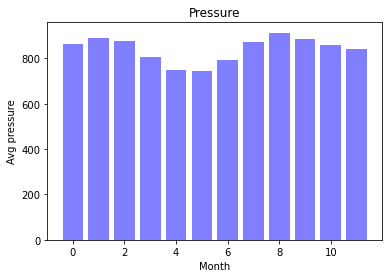

In [71]:
#plotting the months avg pressure
yAxis1 = Avg['pressure']
xAxis1 = np.arange(len(yAxis1))
plt.bar(xAxis1, yAxis1, color='b', alpha=0.5, align="center")
plt.xlabel('Month')
plt.ylabel('Avg pressure')
plt.title('Pressure')

In [ ]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
#did not understnad question 

In [73]:
#Export df to file "mars_df"
table.to_csv (r'C:\Users\zaner\Desktop\mars_df.csv', index = False, header=True)